In [1]:
# 라이브러리 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/model_01_up.csv', encoding='utf-8')

In [3]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-04-21 18:00:00,5.5,12.7,1.1,1.7,1007.0,1.0
1,2018-08-17 07:00:00,10.6,15.2,0.7,1.1,1012.9,1.0
2,2018-06-10 12:00:00,6.5,15.2,0.8,1.2,1005.4,1.0
3,2018-05-20 12:00:00,10.7,18.8,0.8,1.1,1019.9,1.0
4,2015-11-25 09:00:00,6.4,13.3,0.9,1.4,1019.2,1.0
...,...,...,...,...,...,...,...
131095,2018-10-05 02:00:00,8.7,12.3,1.0,1.5,1020.5,0.0
131096,2018-10-05 03:00:00,8.0,12.6,0.9,1.4,1019.9,0.0
131097,2018-10-05 04:00:00,9.6,13.7,1.2,1.8,1019.2,0.0
131098,2018-10-05 05:00:00,9.1,13.7,1.3,2.0,1018.8,0.0


In [4]:
df = df.set_index('일시')
df

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2012-04-21 18:00:00,5.5,12.7,1.1,1.7,1007.0,1.0
2018-08-17 07:00:00,10.6,15.2,0.7,1.1,1012.9,1.0
2018-06-10 12:00:00,6.5,15.2,0.8,1.2,1005.4,1.0
2018-05-20 12:00:00,10.7,18.8,0.8,1.1,1019.9,1.0
2015-11-25 09:00:00,6.4,13.3,0.9,1.4,1019.2,1.0
...,...,...,...,...,...,...
2018-10-05 02:00:00,8.7,12.3,1.0,1.5,1020.5,0.0
2018-10-05 03:00:00,8.0,12.6,0.9,1.4,1019.9,0.0
2018-10-05 04:00:00,9.6,13.7,1.2,1.8,1019.2,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131100 entries, 2012-04-21 18:00:00 to 2018-10-05 06:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WIND_SPEED  131100 non-null  float64
 1   GUST_WIND   131100 non-null  float64
 2   SIG_WAVE    131100 non-null  float64
 3   MAX_WAVE    131100 non-null  float64
 4   HPA         131100 non-null  float64
 5   특보강도        131100 non-null  float64
dtypes: float64(6)
memory usage: 7.0+ MB


In [6]:
# 데이터셋 구성
data = df[['WIND_SPEED', 'GUST_WIND', 'SIG_WAVE', 'MAX_WAVE','HPA']].to_numpy()
target = df['특보강도'].to_numpy()

In [7]:
# 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [8]:
# 훈련세트, 테스트 세트 크기
print(train_input.shape, test_input.shape)

(104880, 5) (26220, 5)


In [9]:
# StandardScaler 사용해서 훈련세트 전처리
# 같은 객체로 테스트 세트 변환
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


# => 둘 다 낮게 나옴 (과소적합?)

0.8287948131197559
0.8261632341723875


In [11]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[0.18054697 0.95717754 1.06000206 1.18503191 0.09163114]] [0.44010348]


In [12]:
# score() 메서드로 정확도 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.9999713958810069
0.9844393592677345


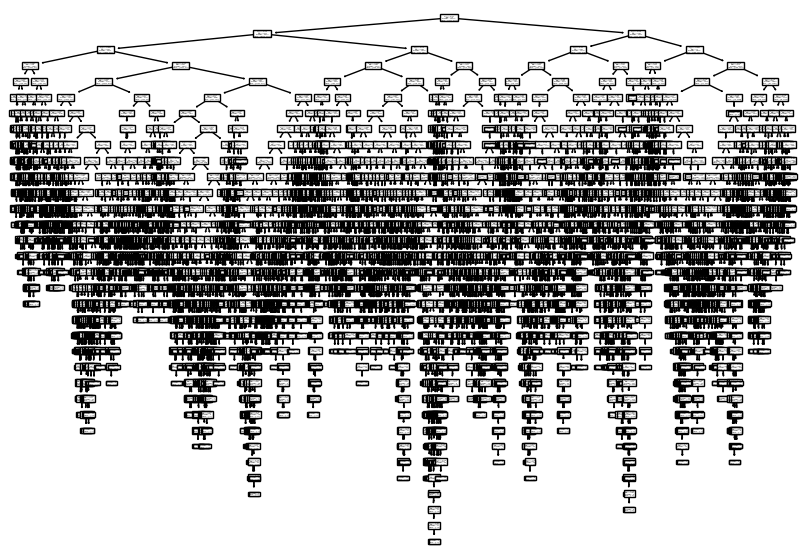

In [13]:
# plot_tree() 트리
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

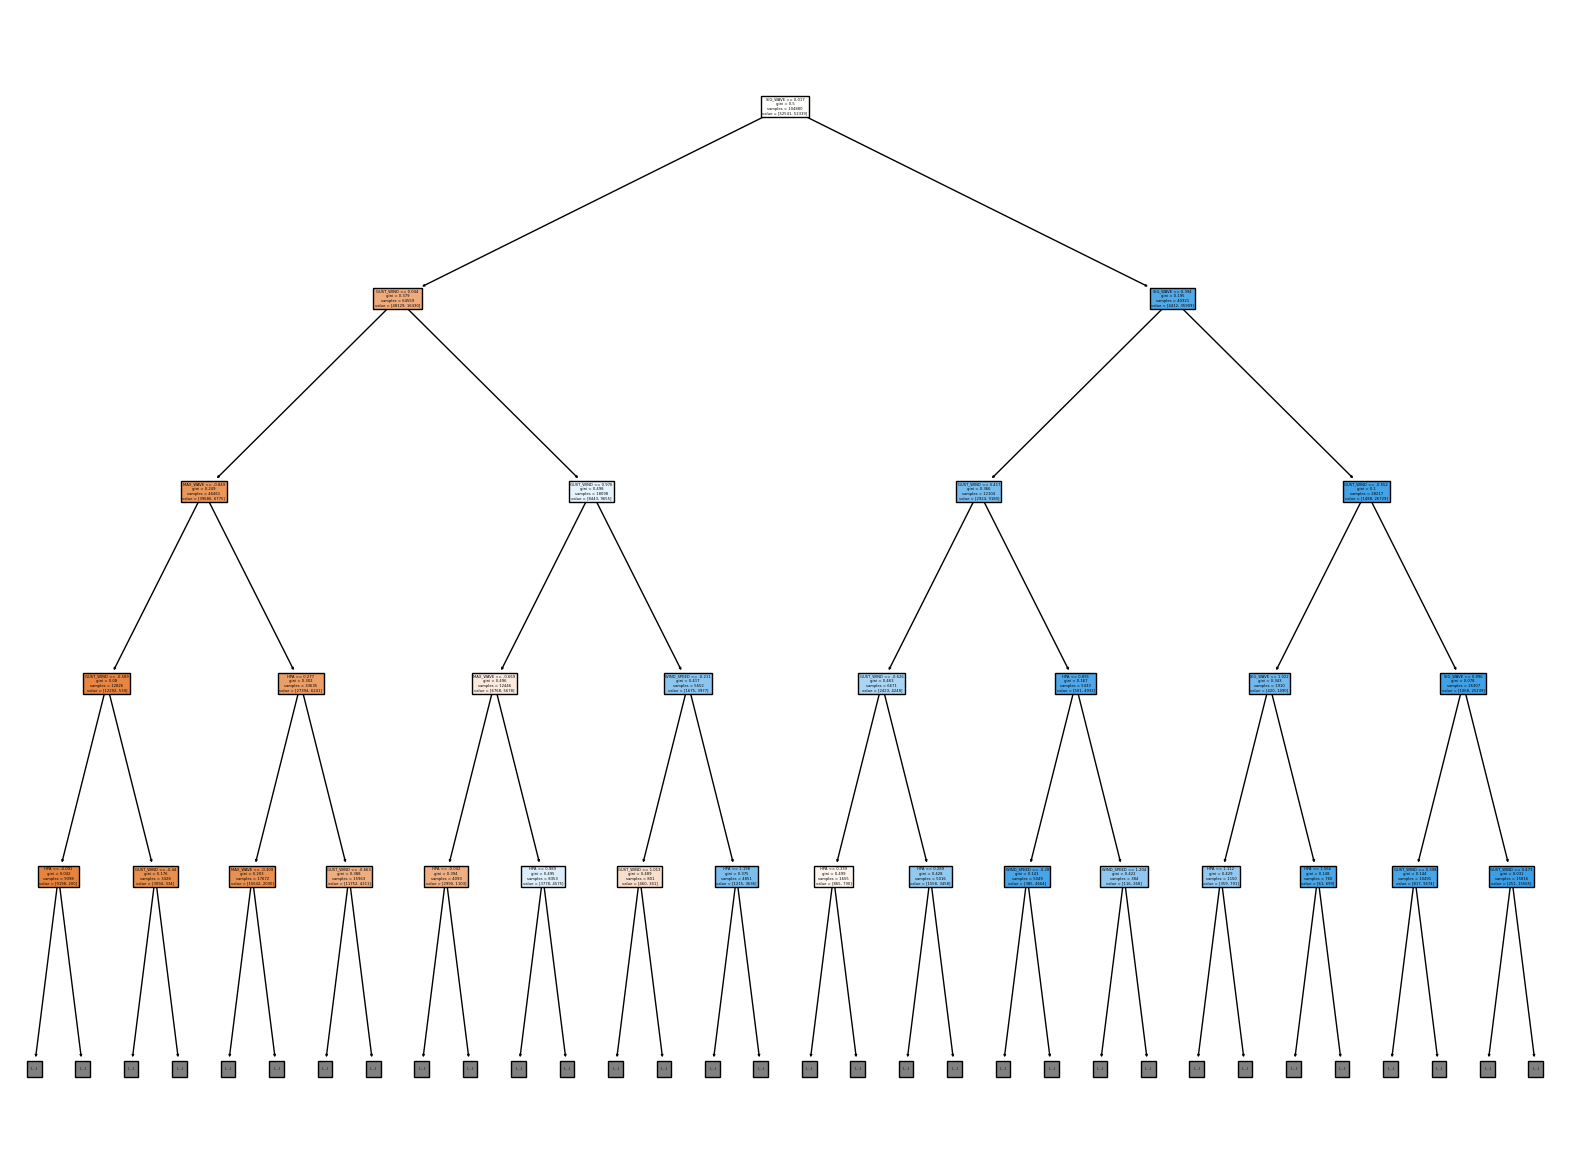

In [14]:
# 트리 깊이 제한
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=4, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [15]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8232265446224256
0.8242944317315026


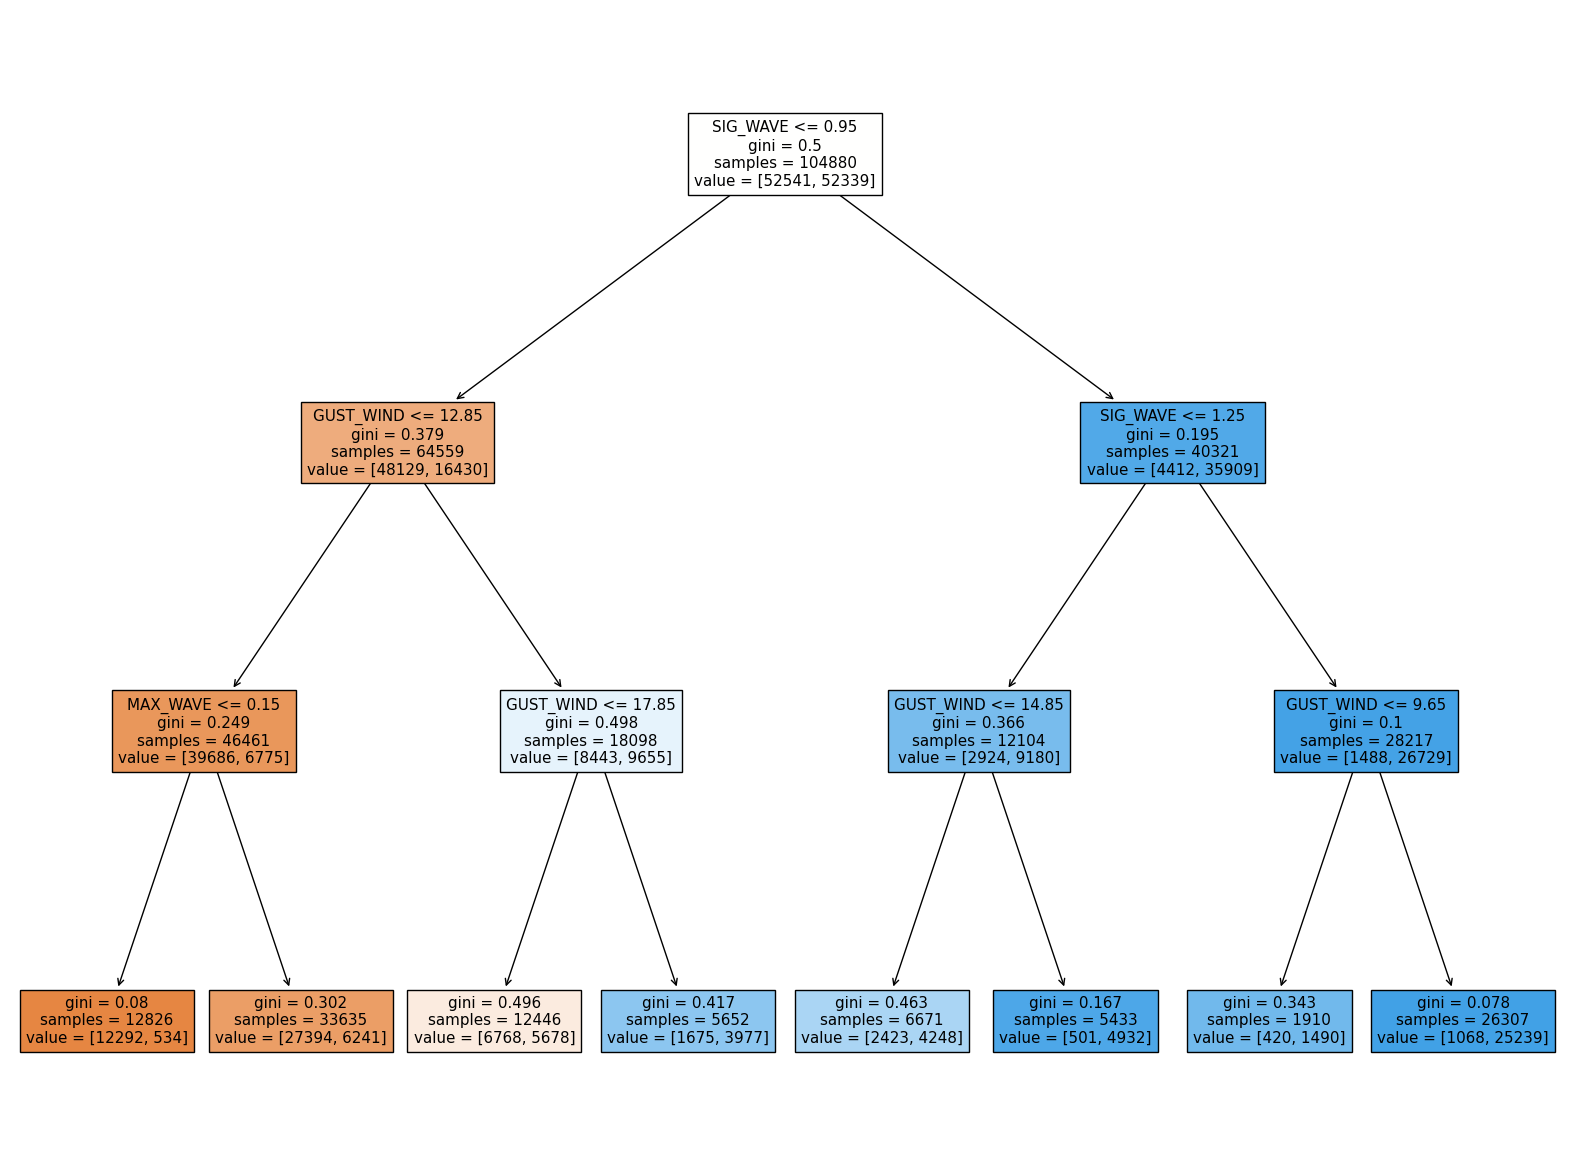

In [16]:
# plot tree()
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [17]:
# 특성 중요도
print(dt.feature_importances_)

[0.         0.19006101 0.01478343 0.79515556 0.        ]
